In [1]:
import requests
import random
from IPython.display import Markdown, display, HTML
from PIL import Image
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

**Generating a movie description...**

1. The friendship between two life-long girlfriends is put to the test when one starts a family and the other falls ill.

Does this movie sound interesting to you? Please type yes or no: fiahsd
Invalid input. Please type yes or no: 
Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

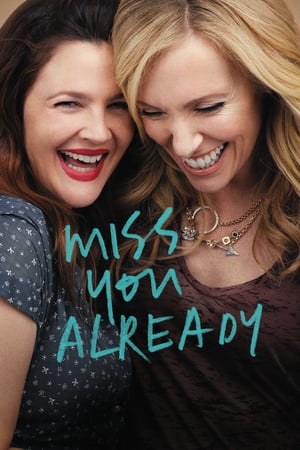

**Title:** Miss You Already

**Genres:** Comedy, Drama, Romance

**Release Date (year-month-date):** 2015-09-12

**Cast Members:** Drew Barrymore, Toni Collette, Dominic Cooper, Jacqueline Bisset, Paddy Considine, Noah Huntley, Tyson Ritter, Mehmet Ferda, Frances de la Tour, Janice Acquah, Honor Kneafsey, Shola Adewusi, Lukas Rolfe, Charlotte Hope, Sophie Holland, Fjokra, Max Rinehart, Grace Schneider, Sophie Brown, Lucinda Raikes

**Number of votes:** 403

**Average Rating (Based on user votes, out of 10):** 7.4

**Description:** The friendship between two life-long girlfriends is put to the test when one starts a family and the other falls ill.

Would you like to watch the trailer of Miss You Already? Please type yes or no: asjf
Invalid input. Please type yes or no: 
Would you like to watch the trailer of Miss You Already? Please type yes or no: no
Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

2. Melody Time is an animated feature produced by Walt Disney and released to theatres by RKO Radio Pictures. Made up of several sequences set to popular music and folk music, the film is, like Make Mine Music before it, the contemporary version of Fantasia.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

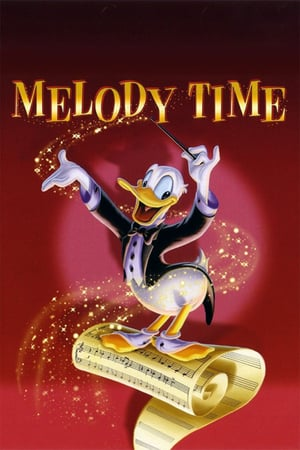

**Title:** Melody Time

**Genres:** Music, Family, Animation

**Release Date (year-month-date):** 1948-05-27

**Cast Members:** Roy Rogers, Dennis Day, Freddy Martin, Frances Langford, Sons of the Pioneers, Fred Waring and His Pennsylvanians, Ethel Smith, Trigger, Bobby Driscoll, Luana Patten, Patty Andrews, Maxene Andrews, Laverne Andrews

**Number of votes:** 86

**Average Rating (Based on user votes, out of 10):** 6.3

**Description:** Melody Time is an animated feature produced by Walt Disney and released to theatres by RKO Radio Pictures. Made up of several sequences set to popular music and folk music, the film is, like Make Mine Music before it, the contemporary version of Fantasia.

Would you like to watch the trailer of Melody Time? Please type yes or no: yes


Would you like to generate more movies? Please type yes or no: fajds
Invalid input. Please type yes or no: 
Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

3. An ageing punk-with-a-dog and his brother the conformist decide to get their revenge on a shopping mall.  Directing duo Benoit Delepine and Gustave Kervern, longstanding comic crusaders against capitalism, again set out to surprise and shock the bourgeois audience.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

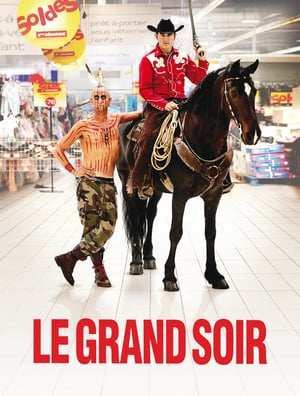

**Title:** Le grand soir

**Genres:** Comedy

**Release Date (year-month-date):** 2012-06-06

**Cast Members:** Benoît Poelvoorde, Albert Dupontel, Brigitte Fontaine, Yolande Moreau, Chloé Mons, Areski Belkacem, Bouli Lanners, Serge Larivière

**Number of votes:** 69

**Average Rating (Based on user votes, out of 10):** 5.8

**Description:** An ageing punk-with-a-dog and his brother the conformist decide to get their revenge on a shopping mall.  Directing duo Benoit Delepine and Gustave Kervern, longstanding comic crusaders against capitalism, again set out to surprise and shock the bourgeois audience.

Would you like to watch the trailer of Le grand soir? Please type yes or no: yes


Would you like to generate more movies? Please type yes or no: no
Would you like to get similar movie titles to: Le grand soir? Please type yes or no: yes


**Getting similar movie titles...**

Locked Out, Louise-Michel, The Cost of Living, A Few Hours Of Spring, Madame Edouard, The Clink of Ice, Mammuth, Chicks, The Bamboo Incident, Family First, Slut in a Good Way, To Be Twenty in the Aures, The New Protocol, Dead Tired, Eldorado, Le créateur, Le plus beau métier du monde, Black Box, Therese, A Man is Dead


In [2]:
page_number = 0
overview_length = 0
movies = 0
count = 1

def printbold(string):
    display(Markdown(string))
    
def moviegenerator():
    amount_of_movies = []
    while(len(amount_of_movies)-1<0):
        global page_number
        page_number = str(random.randint(0,991))
        api_key = 'ed49669e2301eefe165a22a0551c3496'
        response = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=' +  api_key + '&language=en-US&page=' + page_number)
        global movies
        movies = response.json()
        try:
            for i in range(0,len(movies['results'])):
                amount_of_movies.append(movies['results'][i].get('title'))
        except KeyError: 'results'
    if(len(amount_of_movies)!=0):
        global overview_length
        overview_length = random.randint(0,len(amount_of_movies)-1)

def getOverview():
    return str(movies['results'][overview_length].get('overview'))

def getTitle():
    return movies['results'][overview_length].get('title')

def getReleasedate():
    return movies['results'][overview_length].get('release_date')

def getAverageRating():
    return str(movies['results'][overview_length].get('vote_average'))

def getVoteCount():
    return str(movies['results'][overview_length].get('vote_count'))

def getGenre():
    genres = []
    all_genres = []
    genre_names = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    our_movie_genre_ids =  movies['results'][overview_length].get('genre_ids')
    genre_response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' +  api_key + '&language=en-US')
    genre = genre_response.json()
    for i in range(0,len(genre['genres'])):
        all_genres.append(genre['genres'][i].get('id'))
        genre_names.append(genre['genres'][i].get('name'))

    for i in range(0,len(our_movie_genre_ids)):
        for j in range(0,len(all_genres)):
            if our_movie_genre_ids[i] == all_genres[j]:
                genres.append(genre_names[j])
    return (', '.join(genres))

def getPosterpath():
    return movies['results'][overview_length].get('poster_path')

def getMoviePoster():
    poster_url = ('https://image.tmdb.org/t/p/w300/' + getPosterpath())
    response = requests.get(poster_url)
    img = Image.open(BytesIO(response.content))
    return img

def getId():
    return movies['results'][overview_length].get('id')

def getCast():
    all_cast = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    cast_url = ('https://api.themoviedb.org/3/movie/'+ str(getId()) + '/credits?api_key=' + api_key)
    response = requests.get(cast_url)
    cast_members = response.json()
    for i in range(0,len(cast_members['cast'])):
        all_cast.append(cast_members['cast'][i].get('name'))
    return (', '.join(all_cast))

def getSimilarMovies():
    similar_movies = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(getId()) + '/recommendations?api_key=' + api_key + '&language=en-US&page=1')
    recommended_movies = response.json()
    for i in range(0,len(recommended_movies['results'])):
        if recommended_movies['results'] == '[]':
            print("No similar movies found for " + getTitle())
        else:
            similar_movies.append(recommended_movies['results'][i].get('title'))
    return similar_movies

def wantSimilarMovies():
    similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()
    while True:
        if similar_movies_input == 'yes':
            printbold("**Getting similar movie titles...**")
            print(*getSimilarMovies(), sep=', ')
            break
        elif similar_movies_input == 'no':
            print("Hope you enjoy watching " + getTitle() + '!')
            break
        else:
            print('Invalid input. Please type yes or no: ')
            similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()

def getVideoKey():
    video_key = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    videodetails_url = ('https://api.themoviedb.org/3/movie/' + str(getId()) + '/videos?api_key=' + api_key + '&language=en-US')
    video_response = requests.get(videodetails_url)
    response_data = video_response.json()
    for i in range(0,len(response_data['results'])):
        video_key.append(response_data['results'][i].get('key'))
    for key in range(0,len(video_key)):
        first_key = video_key[0]
    return first_key
    
def getTrailer():
    return HTML("<iframe width=560 height=315 src=https://www.youtube.com/embed/" + getVideoKey() + ' frameborder="0" allowfullscreen></iframe>')            
            
def getMoreMovies():
    more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
    while True:
        if more_movies_input == 'yes':
            global count
            count = count + 1
            getEverything()
            break
        elif more_movies_input == 'no':
            wantSimilarMovies()
            break
        else:
            print("Invalid input. Please type yes or no: ")
            more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()    

def getEverything():
    stop = True
    global count
    while stop:
        getMovie()
        user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
        while True:
            if user_input == 'yes':
                getMovieDetails()
                trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                while True:
                    if trailer_input == 'yes':
                        display(getTrailer())
                        getMoreMovies()
                        break
                    elif trailer_input == 'no':
                        getMoreMovies()
                        break
                    else:
                        print("Invalid input. Please type yes or no: ")
                        trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                stop = False
                break
            elif user_input == 'no':
                count = count + 1
                break
            else:
                print("Invalid input. Please type yes or no: ")
                user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
            
def getMovieDetails():
    printbold('**Retrieving movie details...**')
    display(getMoviePoster())
    printbold("**Title:**" + ' ' + getTitle())
    printbold("**Genres:**" + ' ' + getGenre())
    printbold("**Release Date (year-month-date):**" + ' ' + getReleasedate())
    printbold("**Cast Members:**" + ' ' + getCast())
    printbold("**Number of votes:**" + ' ' + getVoteCount())
    printbold("**Average Rating (Based on user votes, out of 10):**" + ' ' + getAverageRating())
    printbold("**Description:**" + ' ' + getOverview())

def getMovie():
    moviegenerator()
    while getOverview() == '':
        moviegenerator()
    printbold('**Generating a movie description...**')
    print(str(count) + '.', getOverview() + '\n')
            
#main function
stop = True
while stop:
    getMovie()
    user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
    while True:
        if user_input == 'yes':
            getMovieDetails()
            trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            while True:
                if trailer_input == 'yes':
                    display(getTrailer())
                    getMoreMovies()
                    break
                elif trailer_input == 'no':
                    getMoreMovies()
                    break
                else:
                    print("Invalid input. Please type yes or no: ")
                    trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            stop = False
            break
        elif user_input == 'no':
            count = count + 1
            break
        else:
            print("Invalid input. Please type yes or no: ")
            user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()